### Tugas Kecil 2 IF3170 Inteligensi Buatan
Anggota Kelompok:
1. 13521015 - Hidayatullah Wildan G.B.
2. 13521024 - Ahmad Nadil

In [14]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # Plotting
import seaborn as sns
import math
from scipy.stats import pointbiserialr

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

kaggle/input\data-tugas-2-if3170\data_train.csv
kaggle/input\data-tugas-2-if3170\data_validation.csv


# Import Datasets

In [15]:
df = pd.read_csv('kaggle/input/data-tugas-2-if3170/data_train.csv')
df

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,804,1,0.8,1,12,1,41,0.9,89,1,...,709,818,2027,11,5,11,1,0,0,1
1,1042,0,2.2,0,15,1,11,0.6,139,5,...,68,1018,2826,18,0,2,1,0,0,2
2,1481,1,2.0,1,0,0,35,0.5,105,3,...,249,522,2635,17,16,4,1,0,1,2
3,1104,0,1.7,0,1,1,60,0.4,199,2,...,653,1413,1229,6,0,3,1,1,1,0
4,652,0,0.5,1,1,0,58,0.6,142,3,...,464,781,565,18,12,9,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1395,536,1,1.4,0,0,1,53,0.7,135,3,...,547,705,1211,15,10,7,1,0,1,0
1396,1097,0,0.8,0,10,1,21,0.1,160,7,...,1277,1352,2219,15,6,12,1,0,1,2
1397,1179,1,0.5,0,7,1,32,0.3,182,2,...,85,1451,340,16,5,16,1,0,0,0
1398,719,1,0.5,1,0,1,23,0.4,113,6,...,431,1727,3990,14,9,12,1,1,1,3


# Statistik Dasar

In [16]:
# Identifikasi kolom berdasarkan jenis datanya, memisahkan antara kontinu dan kategorikal
continuous_columns = [
    'battery_power', 'clock_speed', 'fc', 'int_memory', 'm_dep',
    'mobile_wt', 'n_cores', 'pc', 'px_height', 'px_width', 'ram',
    'sc_h', 'sc_w', 'talk_time'
]

categorical_columns = [
    'blue', 'dual_sim', 'four_g', 'three_g', 'touch_screen', 'wifi', 'price_range'
]

# Menghitung statistik deskriptif untuk kolom numerik kontinu
stats_numeric = df[continuous_columns].describe()  # Deskripsi dasar: mean, std, min, quartiles, max
stats_numeric.loc['modus'] = df[continuous_columns].mode().iloc[0]  # Menambahkan modus
stats_numeric.loc['std'] = df[continuous_columns].std()  # Menambahkan standar deviasi
stats_numeric.loc['variansi'] = df[continuous_columns].var()  # Menambahkan variansi
stats_numeric.loc['range'] = df[continuous_columns].max() - df[continuous_columns].min()  # Menambahkan rentang
stats_numeric.loc['IQR'] = stats_numeric.loc['75%'] - stats_numeric.loc['25%']  # Menambahkan IQR (Interquartile Range)
stats_numeric.loc['skewness'] = df[continuous_columns].skew()  # Menambahkan skewness
stats_numeric.loc['kurtosis'] = df[continuous_columns].kurt()  # Menambahkan kurtosis

# Menghitung statistik deskriptif untuk kolom kategorikal/biner
stats_categorical = pd.DataFrame(index=['modus', 'count', 'frequency'])

for col in categorical_columns:
    # Untuk setiap kolom kategorikal, temukan modus dan frekuensi modus
    mode_value = df[col].mode()[0]  # Nilai yang paling sering muncul
    mode_count = df[col].value_counts()[mode_value]  # Berapa kali modus muncul
    # Menyimpan hasil dalam DataFrame 'stats_categorical'
    stats_categorical[col] = [mode_value, df[col].count(), mode_count]

# Menampilkan statistik untuk kolom numerik dengan menggunakan 'display' untuk format yang lebih baik dalam Jupyter Notebook
print("Statistik Deskriptif untuk Kolom Numerik:")
stats_numeric

# Menampilkan statistik untuk kolom kategorikal/biner
print("\nStatistik Deskriptif untuk Kolom Kategorikal/Biner:")
stats_categorical

Statistik Deskriptif untuk Kolom Numerik:

Statistik Deskriptif untuk Kolom Kategorikal/Biner:


,blue,dual_sim,four_g,three_g,touch_screen,wifi,price_range
modus,0,1,1,1,0,0,0
count,1400,1400,1400,1400,1400,1400,1400
frequency,709,704,742,1065,715,707,358


# Duplicate Value

In [17]:
# Mencari nilai duplikat dalam DataFrame 'df'.
# `df.duplicated(keep=False)` mengembalikan sebuah Series boolean yang menandai semua baris
# yang merupakan duplikat sebagai `True`. Parameter `keep=False` menandakan bahwa semua
# duplikat harus ditandai sebagai `True`, tidak hanya yang pertama atau yang terakhir.
duplicate_values = df[df.duplicated(keep=False)]

# Menampilkan DataFrame 'duplicate_values' yang hanya berisi baris-baris duplikat.
# Semua baris yang memiliki duplikat dalam 'df' akan ditampilkan di sini, termasuk
# entri duplikatnya.
duplicate_values


,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range


# Missing Value

### Numeric Values

In [18]:
# Inisialisasi daftar kolom non-numerik yang akan dihapus dari dataframe.
non_numeric = ['blue', 'dual_sim', 'four_g', 'three_g', 'touch_screen', 'wifi', 'price_range']

# Menghapus kolom non-numerik dari dataframe 'df' untuk membuat dataframe baru yang hanya berisi data numerik.
df_numeric = df.drop(columns=non_numeric)

# Menemukan dan menyimpan baris dengan nilai yang hilang (NA) di kolom tertentu.
mask_na = df_numeric.isna().any(axis=1)  # Mask untuk nilai NA

missing_values = df_numeric[mask_na]

# 'missing_values' sekarang berisi baris dari 'df_numeric' di mana terdapat setidaknya satu nilai yang hilang.
missing_values

,battery_power,clock_speed,fc,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time


### Non-numeric Values

In [19]:
# Memilih kolom non-numerik dari dataframe 'df' untuk membuat dataframe baru 'df_non_numeric'.
df_non_numeric = df[non_numeric]

# Mencari dan menyimpan baris di dataframe 'df_non_numeric' di mana terdapat nilai yang hilang (NA).
# 'df_non_numeric.isna().any(axis=1)' menghasilkan sebuah Series boolean yang menunjukkan baris mana yang memiliki setidaknya satu NA.
# Kondisi ini digunakan untuk memfilter dan memilih baris yang memiliki nilai hilang.
missing_values_non_numeric = df_non_numeric[(df_non_numeric.isna().any(axis=1))]

# 'missing_values_non_numeric' sekarang berisi baris dari 'df_non_numeric' yang memiliki setidaknya satu nilai hilang.
missing_values_non_numeric

,blue,dual_sim,four_g,three_g,touch_screen,wifi,price_range


# Outlier

In [20]:
# Sumber pengerjaan: https://www.scribbr.com/statistics/outliers/
# Mendefinisikan fungsi 'find_outliers' yang akan digunakan untuk mengidentifikasi outlier
# dalam sebuah DataFrame 'df' sambil mengabaikan kolom tertentu.
def find_outliers(df, ignore_columns):
    # Membuat dictionary kosong untuk menyimpan tabel outlier per kolom.
    outlier_tables = {}

    # Iterasi melalui setiap kolom numerik di DataFrame 'df'.
    for column in df.select_dtypes(include=['number']):
        # Memeriksa jika kolom saat ini tidak termasuk dalam daftar kolom yang diabaikan.
        if column not in ignore_columns:
            # Menghitung kuartil pertama (Q1) dan kuartil ketiga (Q3) dari kolom.
            Q1 = df[column].quantile(0.25)
            Q3 = df[column].quantile(0.75)
            # Menghitung IQR (Interquartile Range) dari kolom.
            IQR = Q3 - Q1
            # Menghitung batas bawah dan batas atas untuk mendeteksi outlier.
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            # Memilih baris yang memiliki nilai di bawah batas bawah atau di atas batas atas.
            column_outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
            # Jika baris outlier ditemukan, menambahkannya ke dictionary 'outlier_tables'.
            if not column_outliers.empty:
                outlier_tables[column] = column_outliers[[column]]
    
    # Mengembalikan dictionary 'outlier_tables' yang berisi tabel-tabel outlier.
    return outlier_tables

# Daftar kolom yang akan diabaikan selama proses deteksi outlier.
ignore_columns = ['blue', 'dual_sim', 'four_g', 'three_g', 'touch_screen', 'wifi', 'price_range']

# Menjalankan fungsi 'find_outliers' untuk mencari outlier di 'df' sambil mengabaikan kolom-kolom tertentu.
outlier_tables = find_outliers(df, ignore_columns)

# Iterasi melalui setiap pasangan kolom dan tabel outlier dalam 'outlier_tables'.
for column, table in outlier_tables.items():
    # Menampilkan tabel outlier untuk setiap kolom yang menggunakan fungsi 'display'.
    # Fungsi 'display' berguna di lingkungan Jupyter Notebook untuk menampilkan output yang diformat.
    display(pd.DataFrame(table))


,fc
53,19
98,18
413,17
603,18
778,18
797,17
1035,18
1072,18
1150,18
1232,18


# Analisis Kolom Numerik dan Non-Numerik

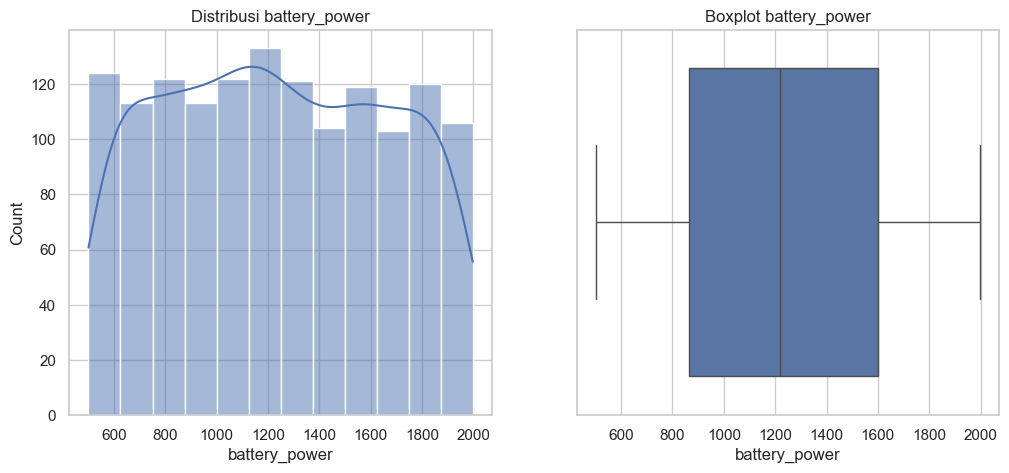

Kurtosis dari battery_power: -1.1680683536883105
Distribusi lebih datar dibandingkan distribusi normal (platykurtic).



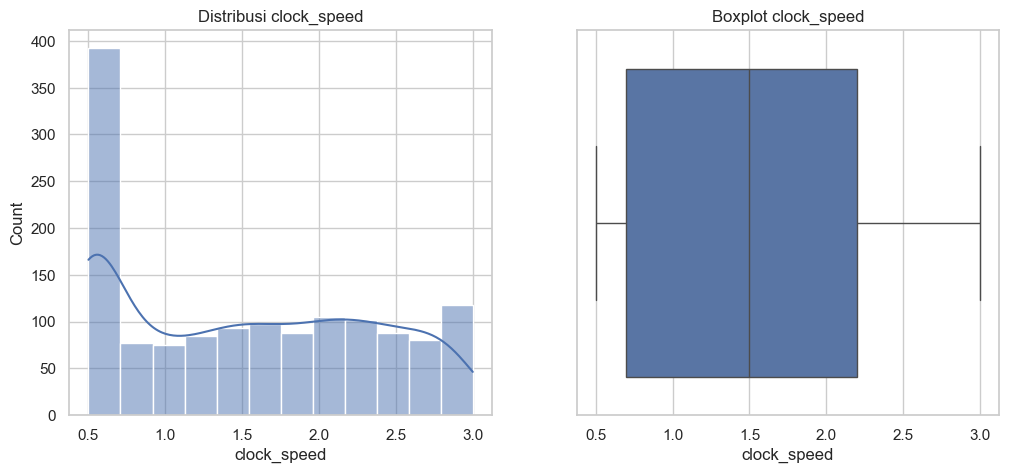

Kurtosis dari clock_speed: -1.3295231896521231
Distribusi lebih datar dibandingkan distribusi normal (platykurtic).



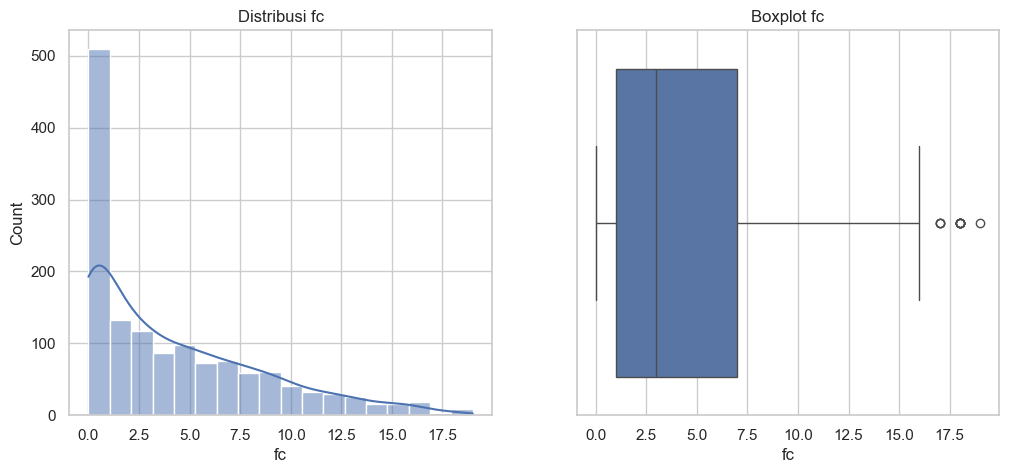

Kurtosis dari fc: 0.29340439238319194
Distribusi memiliki ekor yang lebih berat dan puncak yang lebih tajam dibandingkan distribusi normal (leptokurtic).



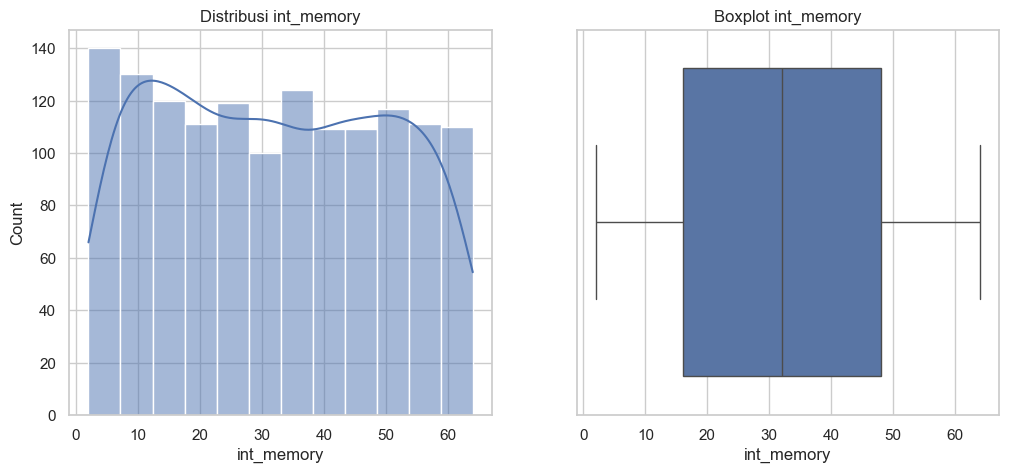

Kurtosis dari int_memory: -1.22719971066165
Distribusi lebih datar dibandingkan distribusi normal (platykurtic).



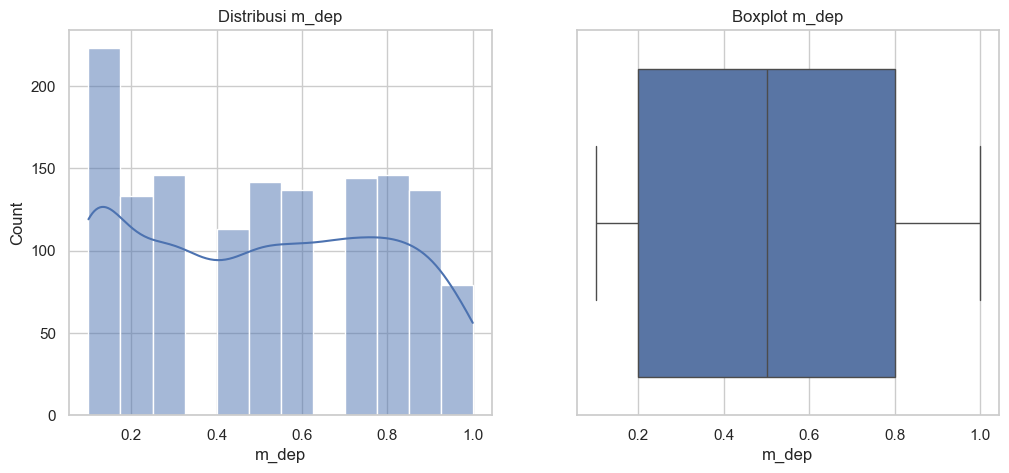

Kurtosis dari m_dep: -1.2668226719440638
Distribusi lebih datar dibandingkan distribusi normal (platykurtic).



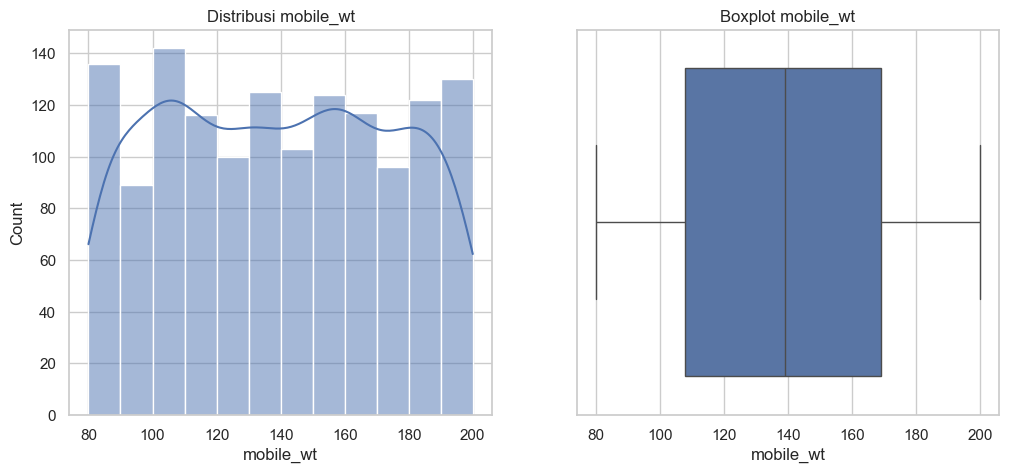

Kurtosis dari mobile_wt: -1.210202007194779
Distribusi lebih datar dibandingkan distribusi normal (platykurtic).



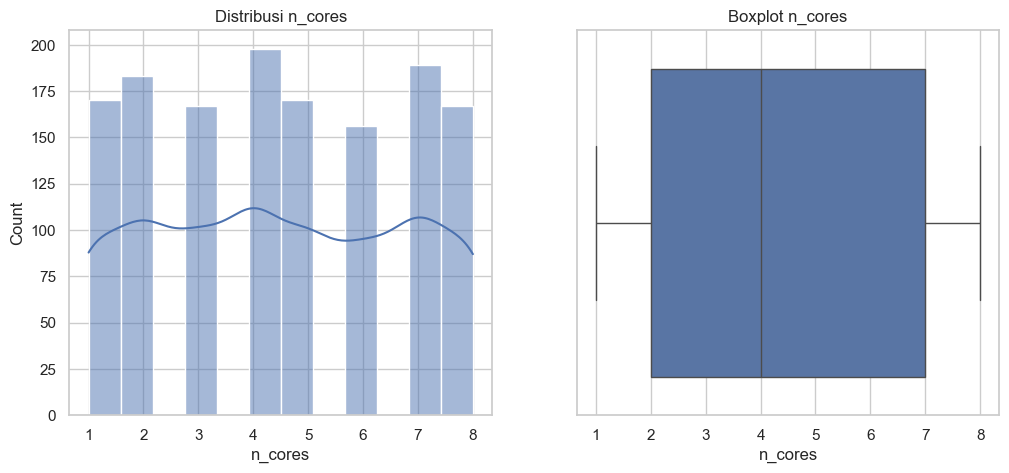

Kurtosis dari n_cores: -1.2322085699401253
Distribusi lebih datar dibandingkan distribusi normal (platykurtic).



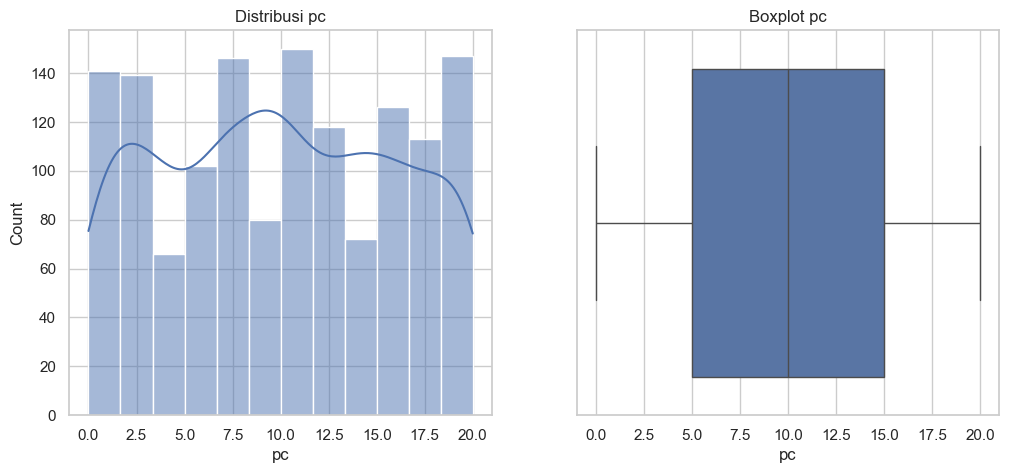

Kurtosis dari pc: -1.1638760893853588
Distribusi lebih datar dibandingkan distribusi normal (platykurtic).



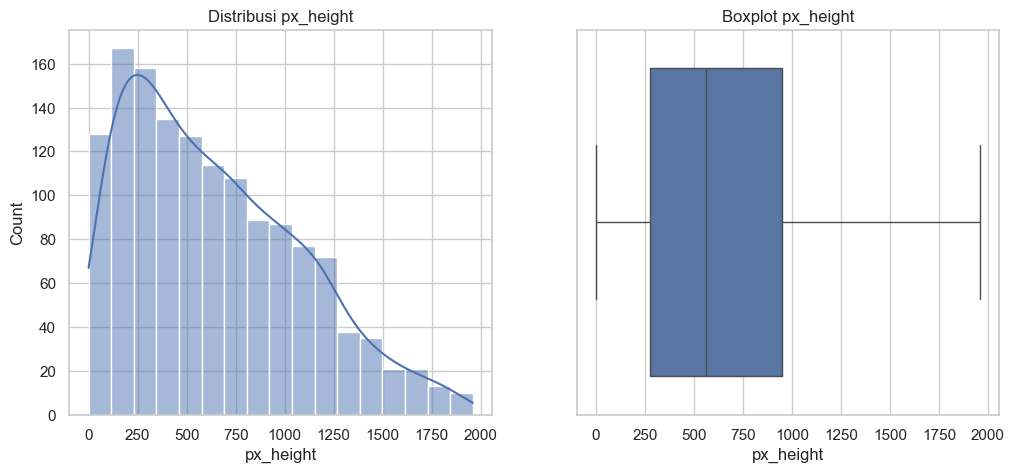

Kurtosis dari px_height: -0.3162286486894521
Distribusi lebih datar dibandingkan distribusi normal (platykurtic).



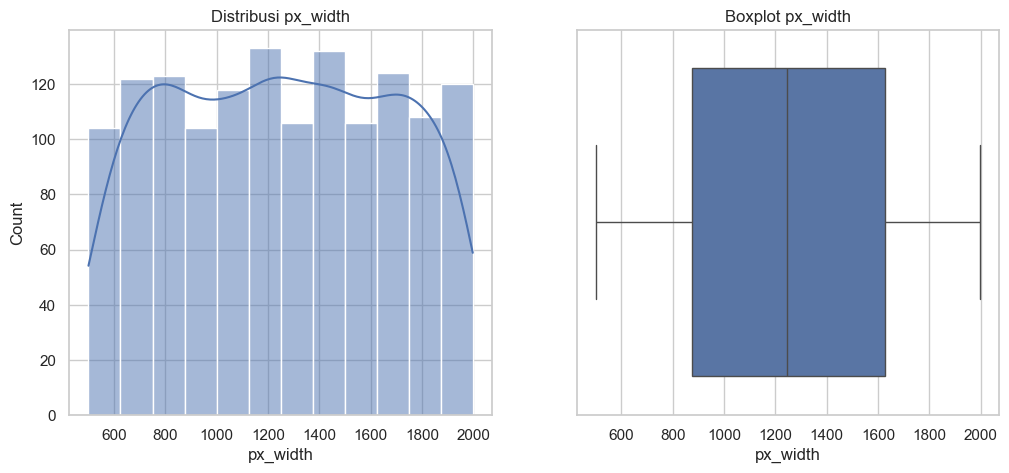

Kurtosis dari px_width: -1.1760245181224622
Distribusi lebih datar dibandingkan distribusi normal (platykurtic).



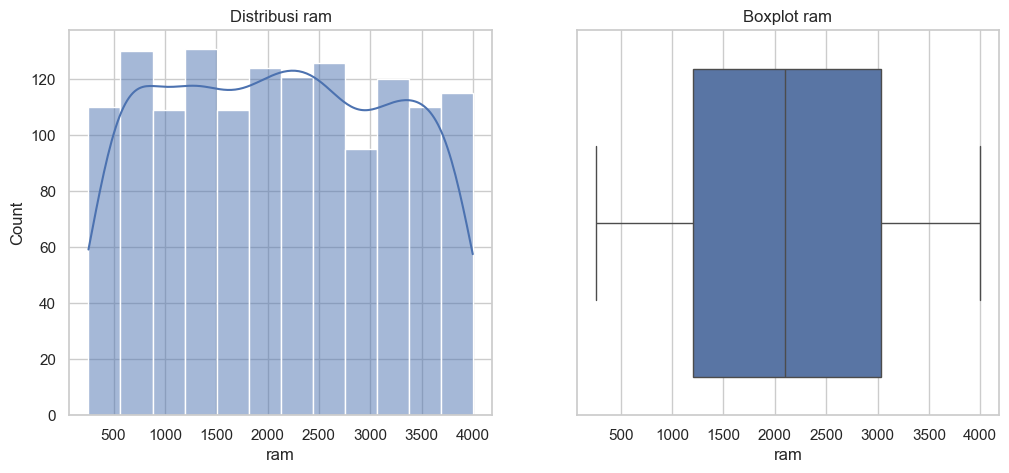

Kurtosis dari ram: -1.1861412453532745
Distribusi lebih datar dibandingkan distribusi normal (platykurtic).



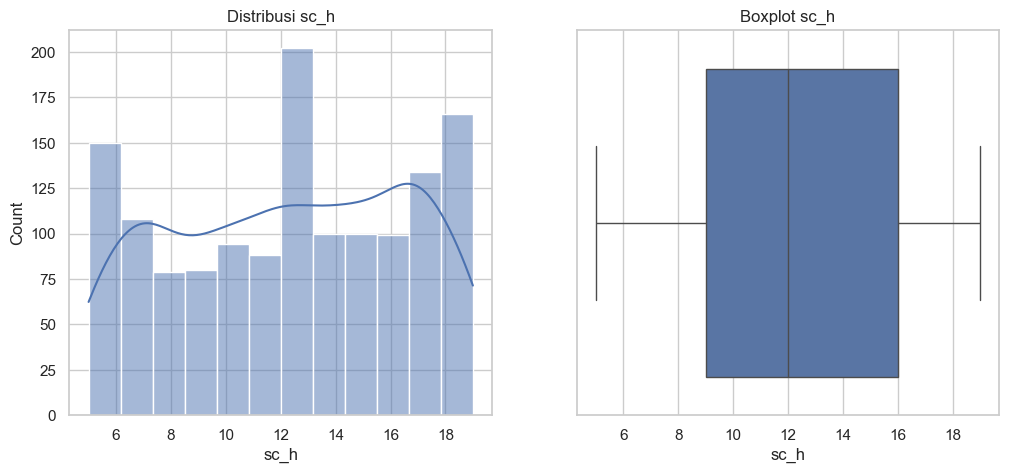

Kurtosis dari sc_h: -1.183273418204271
Distribusi lebih datar dibandingkan distribusi normal (platykurtic).



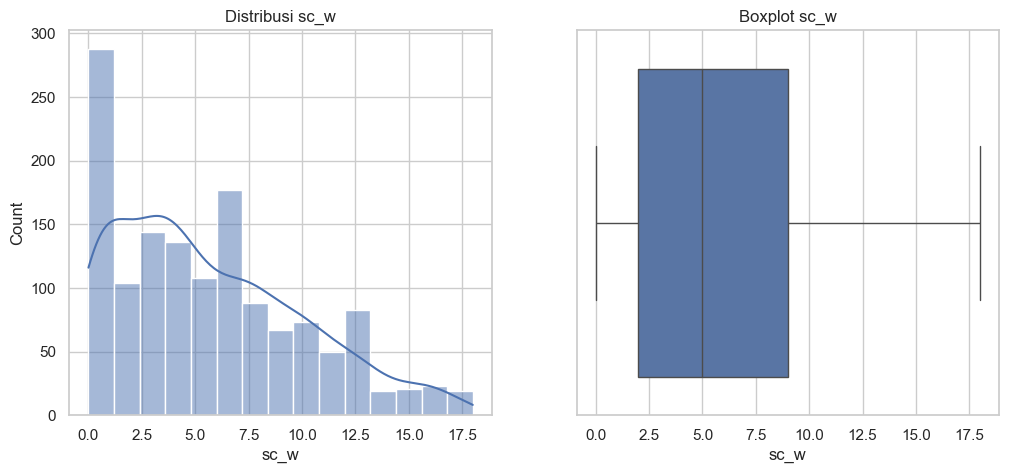

Kurtosis dari sc_w: -0.3346408708969695
Distribusi lebih datar dibandingkan distribusi normal (platykurtic).



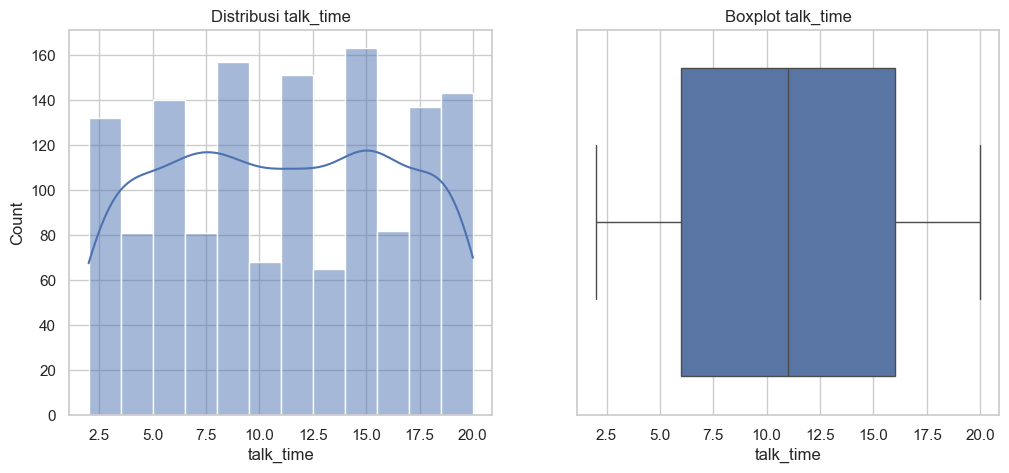

Kurtosis dari talk_time: -1.1920181405410146
Distribusi lebih datar dibandingkan distribusi normal (platykurtic).



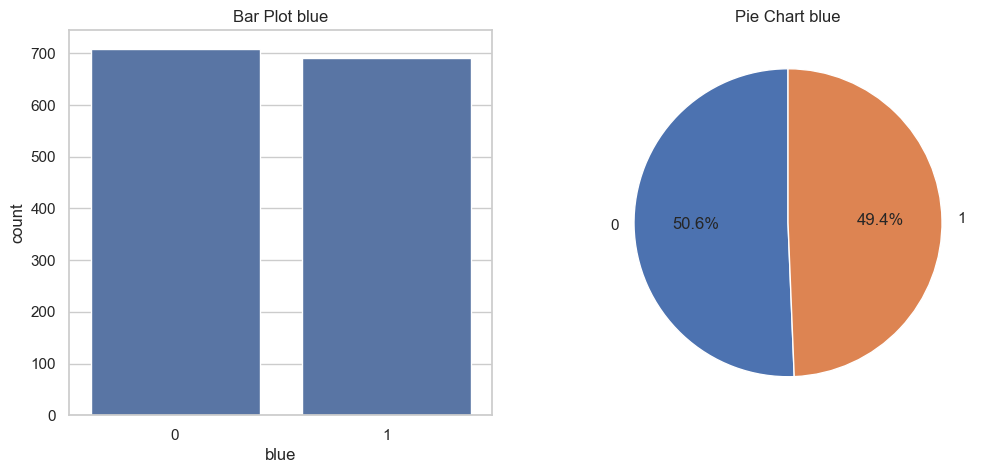

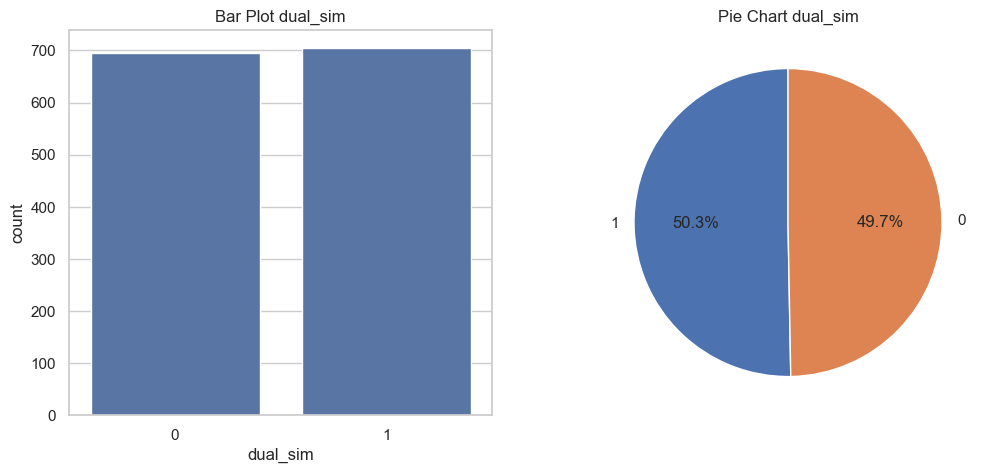

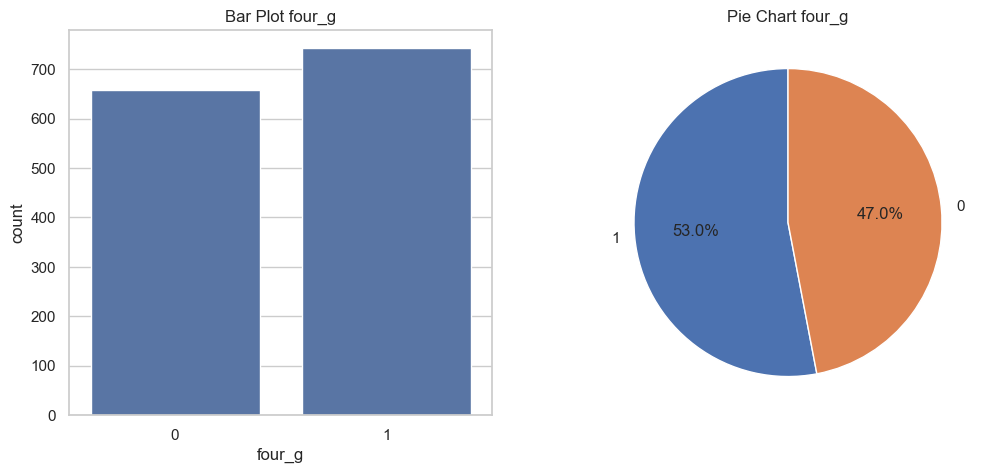

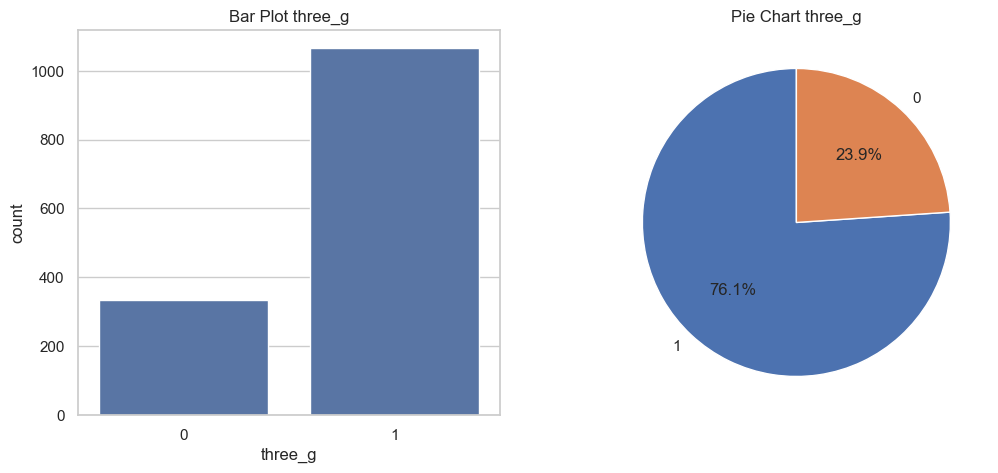

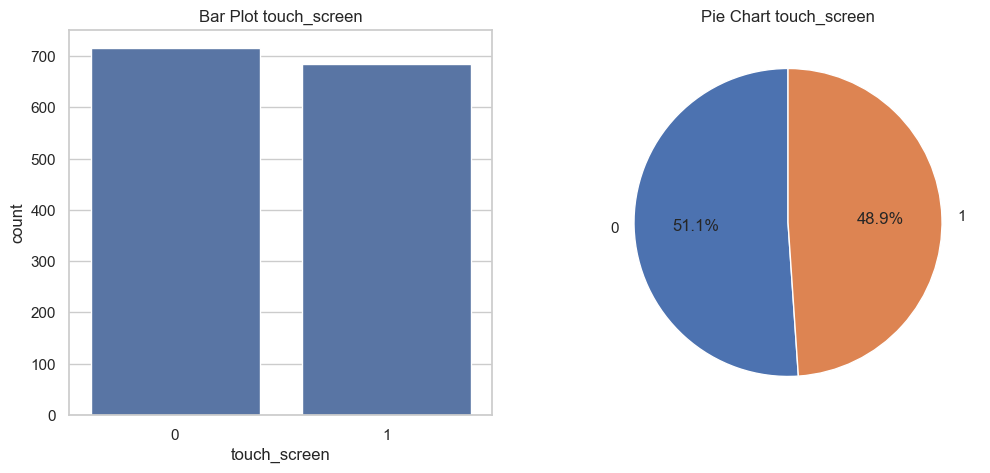

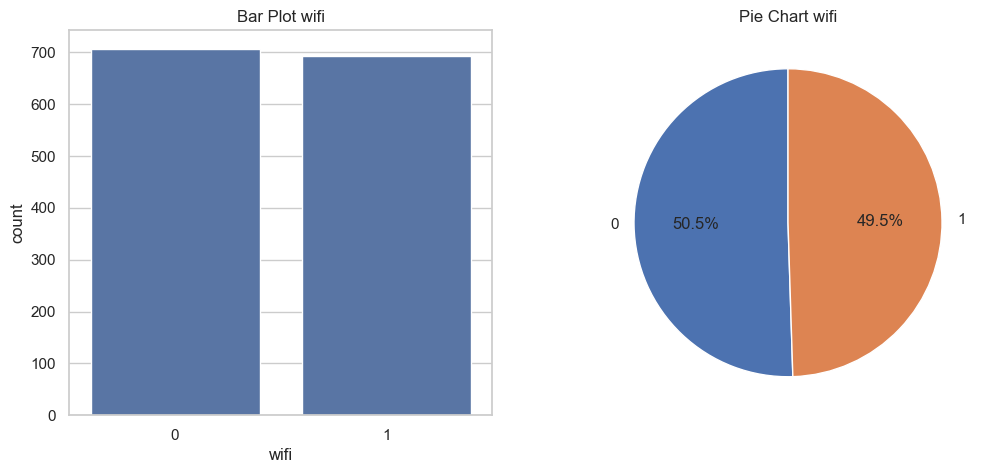

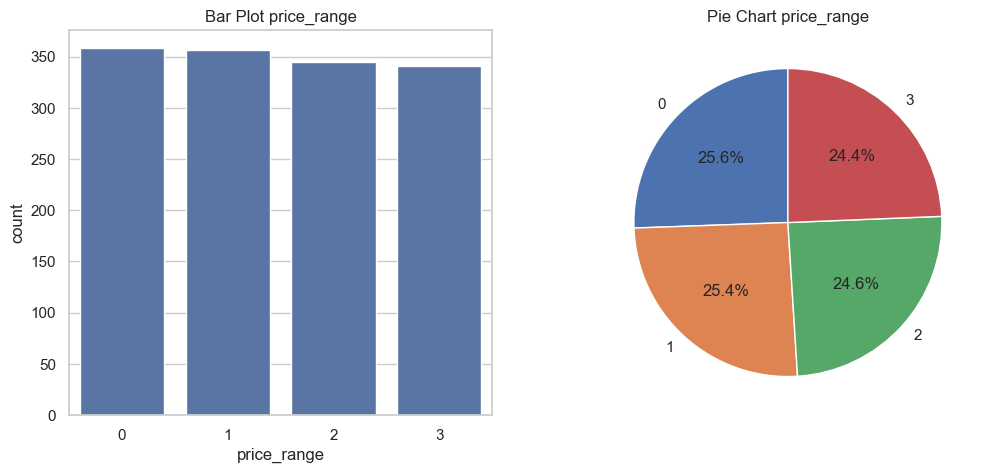

In [21]:
# Mengaktifkan mode inline untuk matplotlib pada Jupyter Notebook 
# untuk memastikan grafik dapat ditampilkan langsung di bawah sel kode.
%matplotlib inline

# Mengatur gaya plot dengan seaborn untuk estetika yang lebih baik.
sns.set(style="whitegrid")

# Analisis untuk Kolom Numerik
for col in continuous_columns:
    # Membuat figure dan axes untuk plot dengan 1 baris dan 2 kolom subplot.
    fig, ax = plt.subplots(1, 2, figsize=(12, 5))
    
    # Plot histogram dengan KDE untuk kolom numerik untuk memeriksa distribusi data.
    sns.histplot(df[col], kde=True, ax=ax[0])
    # Menetapkan judul untuk histogram.
    ax[0].set_title(f'Distribusi {col}')
    
    # Plot boxplot untuk kolom numerik untuk memeriksa keberadaan outlier dan rentang data.
    sns.boxplot(x=df[col], ax=ax[1])
    # Menetapkan judul untuk boxplot.
    ax[1].set_title(f'Boxplot {col}')
    
    # Menampilkan plot yang telah dibuat.
    plt.show()

    # Menghitung dan menampilkan nilai kurtosis untuk kolom numerik.
    kurt_value = df[col].kurt()
    print(f'Kurtosis dari {col}: {kurt_value}')
    # Memberikan interpretasi kurtosis berdasarkan nilai yang dihitung.
    if kurt_value > 0:
        print("Distribusi memiliki ekor yang lebih berat dan puncak yang lebih tajam dibandingkan distribusi normal (leptokurtic).\n")
    elif kurt_value < 0:
        print("Distribusi lebih datar dibandingkan distribusi normal (platykurtic).\n")
    else:
        print("Distribusi memiliki kurtosis yang sama seperti distribusi normal (mesokurtic).\n")

# Analisis untuk Kolom Non Numerik
for col in categorical_columns:
    # Membuat figure dan axes untuk plot dengan 1 baris dan 2 kolom subplot.
    fig, ax = plt.subplots(1, 2, figsize=(12, 5))
    
    # Plot barplot untuk kolom kategorikal untuk melihat frekuensi kategori.
    sns.countplot(x=df[col], ax=ax[0])
    # Menetapkan judul untuk bar plot.
    ax[0].set_title(f'Bar Plot {col}')
    
    # Plot pie chart untuk kolom kategorikal untuk melihat proporsi kategori.
    df[col].value_counts().plot.pie(autopct='%1.1f%%', ax=ax[1], startangle=90)
    # Menetapkan judul untuk pie chart.
    ax[1].set_title(f'Pie Chart {col}')
    # Menghilangkan label y-axis agar tidak membingungkan pada pie chart.
    ax[1].set_ylabel('')
    
    # Menampilkan plot yang telah dibuat.
    plt.show()


# Korelasi dengan Kolom Target

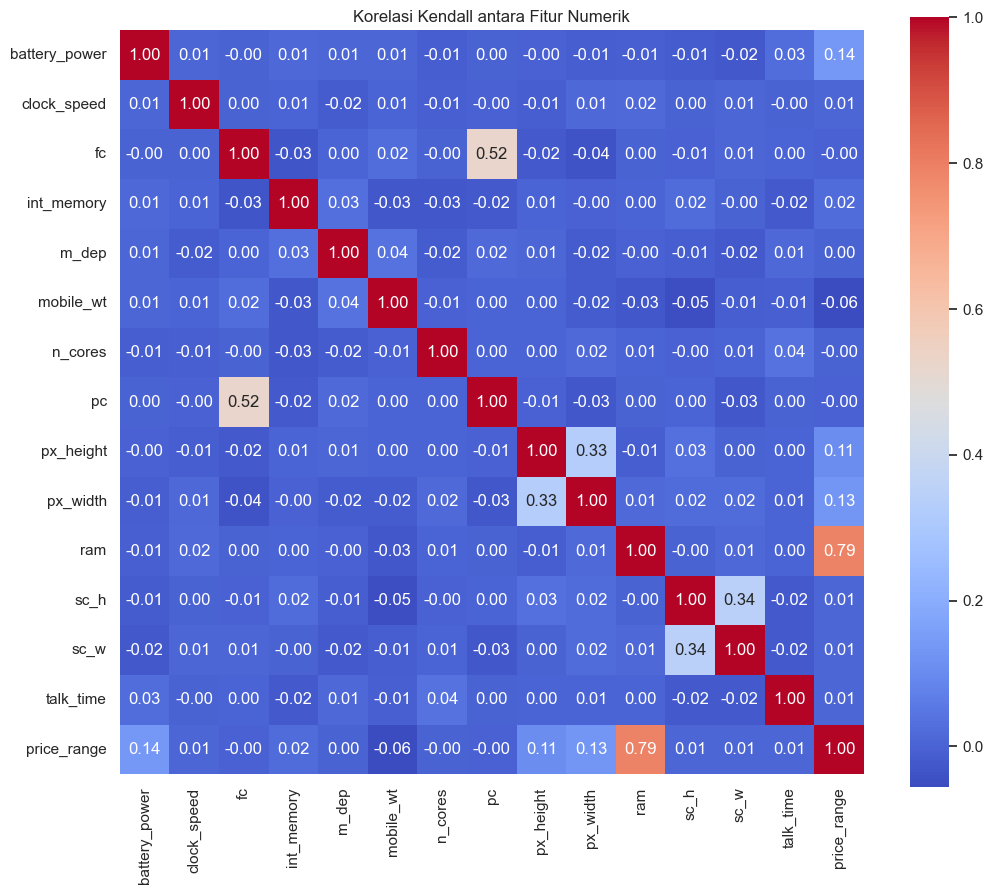

In [22]:
# Menghitung korelasi Kendall untuk kolom numerik
# Metode 'kendall' digunakan karena lebih cocok untuk data yang tidak terdistribusi normal
# dan mampu menangani data ordinal
correlation_matrix_kendall = df[continuous_columns + ['price_range']].corr(method='kendall')

# Visualisasi korelasi dengan heatmap
# Heatmap adalah cara yang efektif untuk memvisualisasikan matriks korelasi,
# di mana warna dan intensitasnya menunjukkan besarnya korelasi antar variabel
plt.figure(figsize=(12, 10))  # Menentukan ukuran gambar yang akan dibuat
sns.heatmap(correlation_matrix_kendall, annot=True, fmt='.2f', cmap='coolwarm', square=True)
# 'annot=True' untuk menampilkan nilai korelasi pada peta
# 'fmt='.2f' untuk memformat tampilan angka hingga dua desimal
# 'cmap' untuk memilih palet warna yang diinginkan
# 'square=True' untuk membuat bentuk kotak dari setiap sel agar lebih rata
plt.title('Korelasi Kendall antara Fitur Numerik')  # Judul dari heatmap
plt.show()  # Menampilkan plot

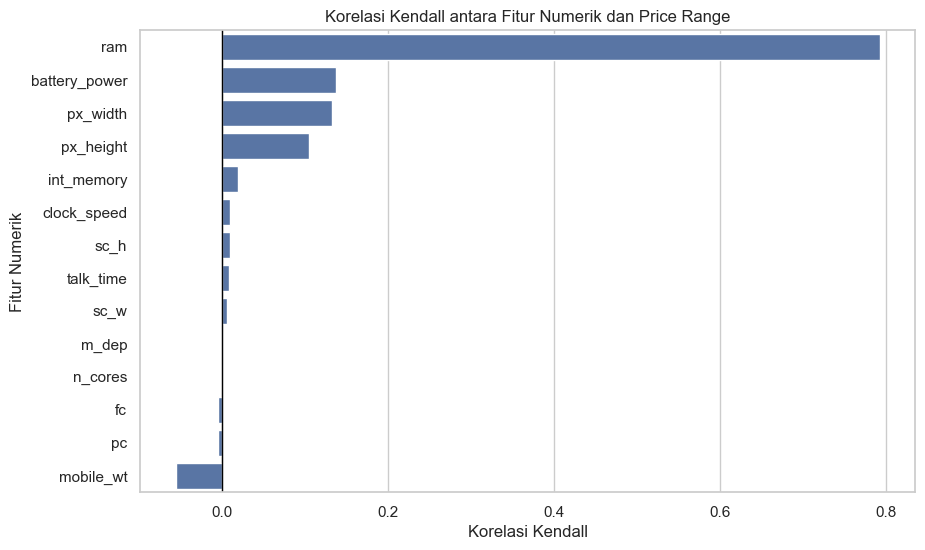

In [23]:
# Menghitung korelasi Kendall antara fitur numerik dan 'price_range'
kendall_correlations_with_target = df[continuous_columns + ['price_range']].corr(method='kendall')['price_range'].sort_values(ascending=False)
# drop tabel price_range
kendall_correlations_with_target = kendall_correlations_with_target.drop('price_range')

# Membuat plot berdasarkan hasil korelasi
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=kendall_correlations_with_target.values, y=kendall_correlations_with_target.index)

ax.axvline(x=0, color='black', linewidth=1)  # Garis vertikal pada nilai 0
ax.set_xlabel('Korelasi Kendall')  # Label untuk sumbu x
ax.set_ylabel('Fitur Numerik')  # Label untuk sumbu y
ax.set_title('Korelasi Kendall antara Fitur Numerik dan Price Range')  # Judul plot
plt.show()

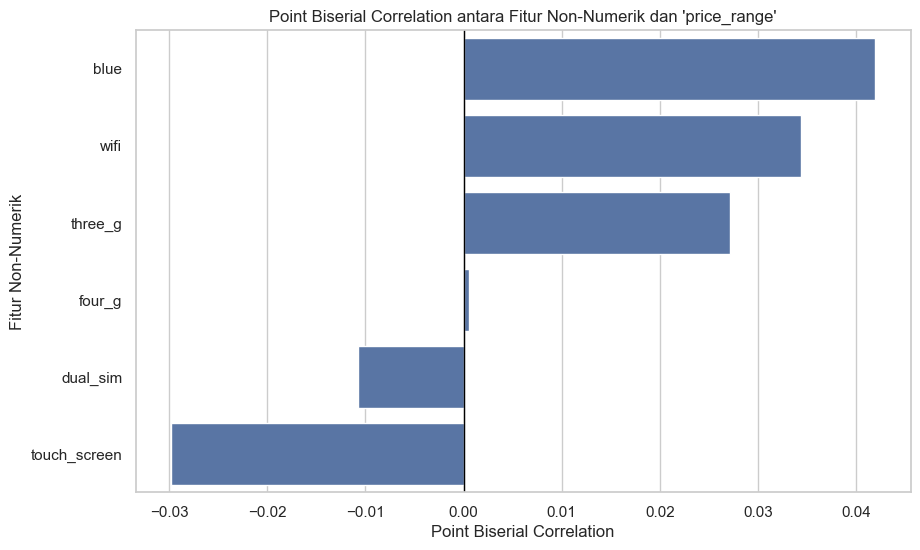

In [24]:
# Analisis korelasi point biserial antara setiap fitur biner dan target 'price_range'
point_biserial_correlations = {}
for col in categorical_columns:
    # Menghitung korelasi dan p-value
    correlation, p_value = pointbiserialr(df[col], df['price_range'])
    point_biserial_correlations[col] = correlation

# Konversi dictionary ke DataFrame untuk visualisasi yang lebih baik
point_biserial_correlations_df = pd.DataFrame.from_dict(point_biserial_correlations, orient='index', columns=['correlation'])
point_biserial_correlations_df.sort_values(by='correlation', ascending=False, inplace=True)
point_biserial_correlations_df = point_biserial_correlations_df.drop(index='price_range')

# Menampilkan hasilnya
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=point_biserial_correlations_df['correlation'].values, y=point_biserial_correlations_df.index)

ax.axvline(x=0, color='black', linewidth=1)  
ax.set_xlabel('Point Biserial Correlation')
ax.set_ylabel('Fitur Non-Numerik')
ax.set_title("Point Biserial Correlation antara Fitur Non-Numerik dan 'price_range'")  # Judul plot
plt.show()